# 특성 공학과 규제

## 다중회귀
- 여러개의 특성을 사용한 선형회귀를 다중 회귀라고 한다.
- 특성이 2개인 경우의 선형 회귀 방정식 : 
$ target = av1 + bv2 + bias $

In [16]:
import numpy as np
import pandas as pd
perch_full = pd.read_csv('perch_full.csv') #농어 특성 데이터
perch_full.head()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [17]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)
perch_full

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


fit(X) : 	X 데이터의 차수와 특성 구조 기억 (훈련용)<br>
transform(X) :	기존 구조에 따라 X를 다항 특성으로 변환<br>
fit_transform(X) :	위 둘을 한 번에 처리 (자주 씀) <br>

In [18]:
from sklearn.preprocessing import PolynomialFeatures # 변환기 import
poly = PolynomialFeatures()# include _bias = False를 하면 절편항을 무시함.-> 1을 제외하고 리턴.
poly.fit([[2,3]])
print(poly.transform([[3,4]]))

[[ 1.  3.  4.  9. 12. 16.]]


In [33]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)



In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9903183436982125


In [35]:
print(lr.score(test_poly,test_target))

0.9714559911594159


### 더 많은 특성을 추가하기 (5제곱 항까지)

In [39]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names_out()


array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4', 'length^5', 'length^4  height', 'length^4  width',
       'length^3  height^2', 'length^3  height  width',
       'length^3  width^2', 'length^2  height^3',
       'length^2  height^2  width', 'length^2  height  width^2',
       'length^2  width^3', 'length  height^4', 'length  height^3  width',
       'length  height^2

In [40]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.999999999999769


## 과대적합으로 보이는 결과값

In [41]:
print(lr.score(test_poly,test_target))

-144.40490595353674


## 규제
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다.<br>
즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것.

일반적으로 선형회귀 모델에 규제를 적용할때 계수 값의 크기가 서로 다르면 공정하게 제어되지 않기 때문에, 정규화를 해야한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # 훈련데이터의 평균과 표준편차를 학습
train_scaled = ss.transform(train_poly) # 학습된 평균과 표준편차를 이용하여 정규화.
test_scaled = ss.transform(test_poly)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]


## 릿지 회귀

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target) 
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615388


릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. </br>
모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다. </br>
alpha값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. </br>
</br>
적절한 alpha 값을 찾는 한가지 방법은 alpha값에 대한 $R^2$ 값의 그래프를 그려보는것이다.

In [44]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [45]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

/var/folders/pd/_d0vc9gs11s74vkzb0d713xw0000gn/T/ipykernel_41207/2173335150.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


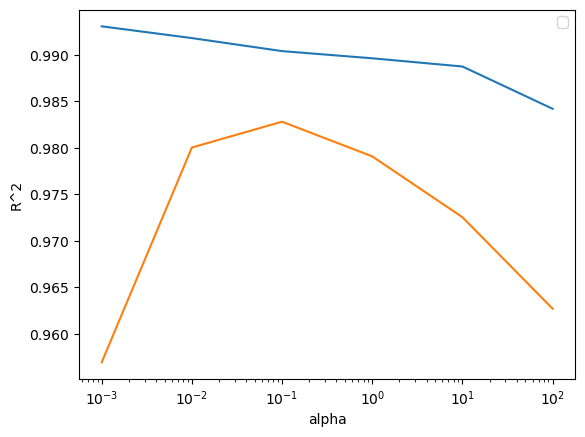

In [54]:
plt.plot(alpha_list,train_score,)
plt.plot(alpha_list,test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

## 라쏘 회귀

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))
print(np.sum(lasso.coef_ == 0))

0.989789897208096
0.9800593698421884
42


라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할수 있다.

/opt/anaconda3/envs/Anaconda3_10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/Anaconda3_10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


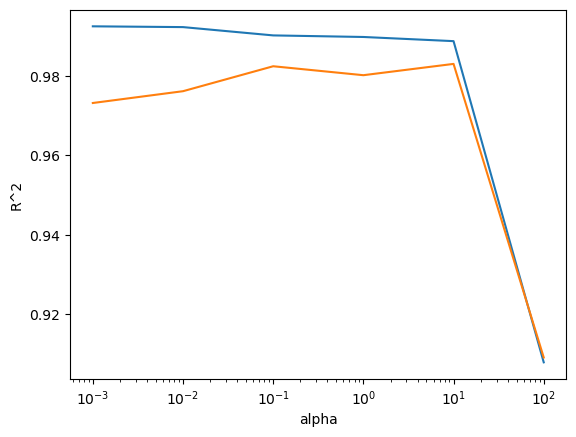

In [60]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))


plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()